In [ ]:
import pandas as pd

# Load the CSV (skipping first row header)
df = pd.read_csv("Recording Emo 1_EPOCFLEX_297824_2025.05.06T11.39.56+05.00.md.bp.csv", header=1)

# Keep necessary columns
eeg_columns = [col for col in df.columns if col.startswith("EEG.") and not col.startswith("EEG.Marker")]
needed_columns = ['Timestamp', 'MarkerType', 'MarkerValueInt'] + eeg_columns
df = df[needed_columns].copy()

# Filter only rows with MarkerType == 1
df = df[df['MarkerType'] == 1].reset_index(drop=True)

# Assign emotions based on MarkerValueInt
emotion_map = {1: 'happy', 2: 'sad', 3: 'angry', 4: 'neutral'}
df['Emotion'] = df['MarkerValueInt'].map(emotion_map)

# Drop rows where Emotion is NaN (i.e., MarkerValueInt not 1–4)
df = df.dropna(subset=['Emotion'])

# Save the final cleaned and labeled dataset
df.to_csv("cleaned_emotion_dataset_from_EEG.csv", index=False)

# Print summary
print("Emotion counts:\n", df['Emotion'].value_counts())
print("\nColumns used:", df.columns.tolist())


Emotion counts:
 Emotion
happy      1
neutral    1
sad        1
angry      1
Name: count, dtype: int64

Columns used: ['Timestamp', 'MarkerType', 'MarkerValueInt', 'EEG.Counter', 'EEG.Interpolated', 'EEG.AF3', 'EEG.F3', 'EEG.T7', 'EEG.O1', 'EEG.O2', 'EEG.T8', 'EEG.F4', 'EEG.AF4', 'EEG.HighBitFlex', 'EEG.SaturationFlag', 'EEG.RawCq', 'EEG.Battery', 'EEG.BatteryPercent', 'Emotion']


In [ ]:
import pandas as pd

# Load data (make sure header=1 if your column names are on the second line)
df = pd.read_csv("/content/Recording Emo 1_EPOCFLEX_297824_2025.05.06T11.39.56+05.00.md.bp.csv", header=1)

# Extract EEG-related columns
eeg_columns = [col for col in df.columns if col.startswith("EEG.") and "Interpolated" not in col and "RawCq" not in col]

# Keep only relevant columns
df = df[['Timestamp', 'MarkerType', 'MarkerValueInt'] + eeg_columns]

# Convert to numeric (errors='coerce' will turn non-numeric to NaN)
df['MarkerType'] = pd.to_numeric(df['MarkerType'], errors='coerce')
df['MarkerValueInt'] = pd.to_numeric(df['MarkerValueInt'], errors='coerce')

# Fill NaNs with 0 for safety
df[['MarkerType', 'MarkerValueInt']] = df[['MarkerType', 'MarkerValueInt']].fillna(0)

# Map emotion IDs to labels
emotion_map = {1: 'happy', 2: 'sad', 3: 'angry', 4: 'neutral'}
emotion_segments = {emotion: [] for emotion in emotion_map.values()}

# Iterate through rows to find emotion segments
i = 0
while i < len(df):
    row = df.iloc[i]
    if row['MarkerType'] == 1 and row['MarkerValueInt'] in emotion_map:
        start_idx = i
        emotion = emotion_map[row['MarkerValueInt']]

        # Search for corresponding end marker
        end_idx = None
        for j in range(i + 1, len(df)):
            if df.iloc[j]['MarkerType'] == 1 and df.iloc[j]['MarkerValueInt'] == 5:
                end_idx = j
                break

        if end_idx is not None:
            segment = df.iloc[start_idx:end_idx + 1].copy()  # include both start and end
            segment['Emotion'] = emotion
            if not segment.empty:
                emotion_segments[emotion].append(segment)
            i = end_idx + 1
        else:
            break
    else:
        i += 1

# Save emotion-specific segments
for emotion, segments in emotion_segments.items():
    if segments:
        result = pd.concat(segments, ignore_index=True)
        result.to_csv(f"{emotion}1.csv", index=False)
        print(f"✅ Saved {emotion}1.csv with {len(result)} rows.")
    else:
        print(f" No data found for {emotion}.")


✅ Saved happy1.csv with 7201 rows.
✅ Saved sad1.csv with 5384 rows.
✅ Saved angry1.csv with 7406 rows.
✅ Saved neutral1.csv with 14791 rows.


In [ ]:
import pandas as pd

# Load data (make sure header=1 if your column names are on the second line)
df = pd.read_csv("/content/Recording Emo 2_EPOCFLEX_297824_2025.05.06T12.03.31+05.00.md.bp.csv", header=1)

# Extract EEG-related columns
eeg_columns = [col for col in df.columns if col.startswith("EEG.") and "Interpolated" not in col and "RawCq" not in col]

# Keep only relevant columns
df = df[['Timestamp', 'MarkerType', 'MarkerValueInt'] + eeg_columns]

# Convert to numeric (errors='coerce' will turn non-numeric to NaN)
df['MarkerType'] = pd.to_numeric(df['MarkerType'], errors='coerce')
df['MarkerValueInt'] = pd.to_numeric(df['MarkerValueInt'], errors='coerce')

# Fill NaNs with 0 for safety
df[['MarkerType', 'MarkerValueInt']] = df[['MarkerType', 'MarkerValueInt']].fillna(0)

# Map emotion IDs to labels
emotion_map = {1: 'happy', 2: 'sad', 3: 'angry', 4: 'neutral'}
emotion_segments = {emotion: [] for emotion in emotion_map.values()}

# Iterate through rows to find emotion segments
i = 0
while i < len(df):
    row = df.iloc[i]
    if row['MarkerType'] == 1 and row['MarkerValueInt'] in emotion_map:
        start_idx = i
        emotion = emotion_map[row['MarkerValueInt']]

        # Search for corresponding end marker
        end_idx = None
        for j in range(i + 1, len(df)):
            if df.iloc[j]['MarkerType'] == 1 and df.iloc[j]['MarkerValueInt'] == 5:
                end_idx = j
                break

        if end_idx is not None:
            segment = df.iloc[start_idx:end_idx + 1].copy()  # include both start and end
            segment['Emotion'] = emotion
            if not segment.empty:
                emotion_segments[emotion].append(segment)
            i = end_idx + 1
        else:
            break
    else:
        i += 1

# Save emotion-specific segments
for emotion, segments in emotion_segments.items():
    if segments:
        result = pd.concat(segments, ignore_index=True)
        result.to_csv(f"{emotion}2.csv", index=False)
        print(f"✅ Saved {emotion}2.csv with {len(result)} rows.")
    else:
        print(f" No data found for {emotion}.")


✅ Saved happy2.csv with 1657 rows.
✅ Saved sad2.csv with 6247 rows.
✅ Saved angry2.csv with 3298 rows.
✅ Saved neutral2.csv with 6519 rows.


In [ ]:
import pandas as pd

# Load data (make sure header=1 if your column names are on the second line)
df = pd.read_csv("/content/Recording emo 3_EPOCFLEX_297824_2025.05.06T12.10.19+05.00.md.bp.csv", header=1)

# Extract EEG-related columns
eeg_columns = [col for col in df.columns if col.startswith("EEG.") and "Interpolated" not in col and "RawCq" not in col]

# Keep only relevant columns
df = df[['Timestamp', 'MarkerType', 'MarkerValueInt'] + eeg_columns]

# Convert to numeric (errors='coerce' will turn non-numeric to NaN)
df['MarkerType'] = pd.to_numeric(df['MarkerType'], errors='coerce')
df['MarkerValueInt'] = pd.to_numeric(df['MarkerValueInt'], errors='coerce')

# Fill NaNs with 0 for safety
df[['MarkerType', 'MarkerValueInt']] = df[['MarkerType', 'MarkerValueInt']].fillna(0)

# Map emotion IDs to labels
emotion_map = {1: 'happy', 2: 'sad', 3: 'angry', 4: 'neutral'}
emotion_segments = {emotion: [] for emotion in emotion_map.values()}

# Iterate through rows to find emotion segments
i = 0
while i < len(df):
    row = df.iloc[i]
    if row['MarkerType'] == 1 and row['MarkerValueInt'] in emotion_map:
        start_idx = i
        emotion = emotion_map[row['MarkerValueInt']]

        # Search for corresponding end marker
        end_idx = None
        for j in range(i + 1, len(df)):
            if df.iloc[j]['MarkerType'] == 1 and df.iloc[j]['MarkerValueInt'] == 5:
                end_idx = j
                break

        if end_idx is not None:
            segment = df.iloc[start_idx:end_idx + 1].copy()  # include both start and end
            segment['Emotion'] = emotion
            if not segment.empty:
                emotion_segments[emotion].append(segment)
            i = end_idx + 1
        else:
            break
    else:
        i += 1

# Save emotion-specific segments
for emotion, segments in emotion_segments.items():
    if segments:
        result = pd.concat(segments, ignore_index=True)
        result.to_csv(f"{emotion}3.csv", index=False)
        print(f"✅ Saved {emotion}3.csv with {len(result)} rows.")
    else:
        print(f" No data found for {emotion}.")


✅ Saved happy3.csv with 10093 rows.
✅ Saved sad3.csv with 6197 rows.
✅ Saved angry3.csv with 10307 rows.
✅ Saved neutral3.csv with 9668 rows.


In [ ]:
pip install pandas numpy scikit-learn tensorflow


In [ ]:
import glob
import os
import pandas as pd
import numpy as np

In [ ]:
file_paths = [
"/content/angry1.csv", "/content/angry2.csv", "/content/angry3.csv",
"/content/happy1.csv", "/content/happy2.csv", "/content/happy3.csv",
"/content/neutral1.csv", "/content/neutral2.csv", "/content/neutral3.csv",
"/content/sad1.csv", "/content/sad2.csv", "/content/sad3.csv"
]

In [ ]:
# emotion_map = {
# "happy": 1, "sad": 2, "angry": 3,"neutral": 4
# }
emotion_map = {
"happy": 0,
"sad": 1,
"angry": 2,
"neutral": 3
}

In [ ]:
data = []
labels = []
for path in file_paths:
  filename = os.path.basename(path) # get file name like 'angry1.csv'
  emotion = ''.join([c for c in filename if not c.isdigit()]).replace(".csv", "")

  if emotion not in emotion_map:
    print(f"Unknown emotion in file: {filename}, skipping...")
    continue
  label = emotion_map[emotion]
  df = pd.read_csv(path)
  df = df.select_dtypes(include="number").fillna(0)  # keep only numeric columns
  data.append(df.values)
  labels.append(label)


In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Masking
# from tensorflow.keras.utils import to_categorical

# # Step 1: Pad sequences (make all EEG sequences same length)
# MAX_SEQ_LEN = 300  # You can adjust this based on your data

# padded_data = pad_sequences(data, maxlen=MAX_SEQ_LEN, dtype='float32', padding='post', truncating='post')

# # Step 2: Convert labels to categorical (if needed)
# num_classes = 4
# labels_categorical = to_categorical(labels, num_classes=num_classes)

# # Step 3: Train/test split
# X_train, X_test, y_train, y_test = train_test_split(padded_data, labels_categorical, test_size=0.2, random_state=42)

# # Step 4: Build LSTM model
# model = Sequential([
#     Masking(mask_value=0.0, input_shape=(MAX_SEQ_LEN, padded_data.shape[2])),
#     LSTM(64, return_sequences=False),
#     Dense(32, activation='relu'),
#     Dense(num_classes, activation='softmax')
# ])

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Step 5: Train
# model.fit(X_train, y_train, epochs=30, batch_size=4, validation_split=0.2)

# # Step 6: Evaluate
# loss, acc = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {acc:.2f}")


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Step 1: Load all 12 files
file_paths = [
    "/content/angry1.csv", "/content/angry2.csv", "/content/angry3.csv",
    "/content/happy1.csv", "/content/happy2.csv", "/content/happy3.csv",
    "/content/sad1.csv", "/content/sad2.csv", "/content/sad3.csv",
    "/content/neutral1.csv", "/content/neutral2.csv", "/content/neutral3.csv"
]

emotion_map = {"happy": 0, "sad": 1, "angry": 2, "neutral": 3}

X_all = []
y_all = []

for path in file_paths:
    df = pd.read_csv(path)

    # Drop non-feature columns
    df = df.drop(columns=["Timestamp", "MarkerValueInt", "Emotion", "markerindex"], errors='ignore')

    # Drop rows with missing data
    df = df.dropna()

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(df.values)

    # Use the emotion name from filename
    filename = os.path.basename(path)
    emotion_label = ''.join(filter(lambda x: not x.isdigit(), filename)).replace('.csv', '')

    y = [emotion_map[emotion_label]] * len(X)

    X_all.append(X)
    y_all.extend(y)

# Combine all
X_all = np.vstack(X_all)
y_all = np.array(y_all)

# Reshape for LSTM: (samples, time_steps, features)
# Let's treat each sequence of 10 rows as one sequence (windowing)
def create_sequences(X, y, seq_length=10):
    X_seq = []
    y_seq = []
    for i in range(0, len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length-1])  # label from last time step
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_all, y_all)

# One-hot encode labels
y_cat = to_categorical(y_seq, num_classes=4)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_cat, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(X_seq.shape[1], X_seq.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.4447 - loss: 1.2096 - val_accuracy: 0.6431 - val_loss: 0.8812
Epoch 2/30
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6961 - loss: 0.7618 - val_accuracy: 0.7878 - val_loss: 0.5685
Epoch 3/30
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7806 - loss: 0.5696 - val_accuracy: 0.8419 - val_loss: 0.4282
Epoch 4/30
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8305 - loss: 0.4543 - val_accuracy: 0.8688 - val_loss: 0.3667
Epoch 5/30
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8554 - loss: 0.3943 - val_accuracy: 0.8832 - val_loss: 0.3300
Epoch 6/30
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8752 - loss: 0.3457 - val_accuracy: 0.8823 - val_loss: 0.3421
Epoch 7/30
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8919 - loss: 0.2988 - val_accuracy: 0.9089 - val_loss: 0.2608
Epoch 8/30
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9057 - loss: 0

In [ ]:
from tensorflow import keras
model.save("emotion_model.h5")
print("Model saved to emotion_model.h5")


Model saved to emotion_model.h5


In [ ]:
import numpy as np
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)


555/555 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_test_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[3768   15   27   24]
 [  28 3344   99   93]
 [  34   14 4111    9]
 [   8   22   24 6132]]


In [ ]:
target_names = ["Happy", "Sad", "Angry", "Neutral"]
report = classification_report(y_test_labels, y_pred_labels, target_names=target_names)
print(report)

              precision    recall  f1-score   support

       Happy       0.98      0.98      0.98      3834
         Sad       0.98      0.94      0.96      3564
       Angry       0.96      0.99      0.98      4168
     Neutral       0.98      0.99      0.99      6186

    accuracy                           0.98     17752
   macro avg       0.98      0.97      0.98     17752
weighted avg       0.98      0.98      0.98     17752



In [ ]:
model.save("emotion_model.h5")  # For Keras HDF5 format


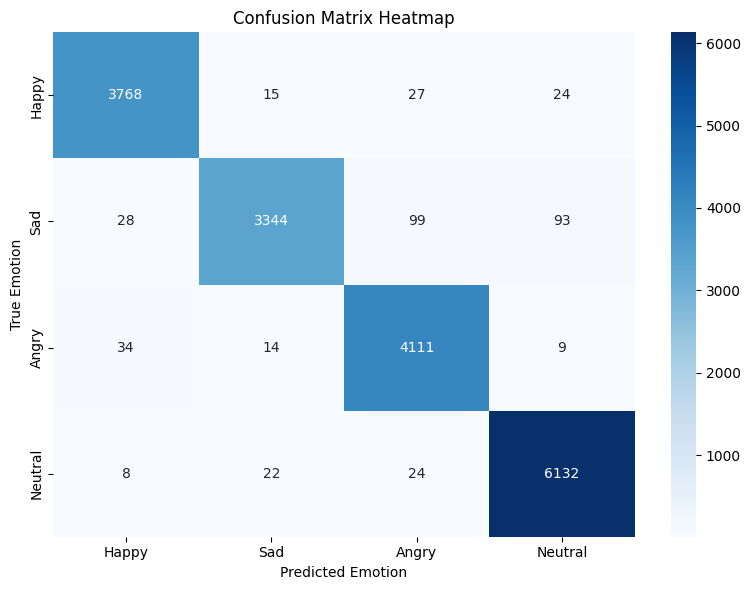

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

emotion_labels = ["Happy", "Sad", "Angry", "Neutral"]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=emotion_labels, yticklabels=emotion_labels)

plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.tight_layout()
plt.show()

In [ ]:
!pip install flask flask-ngrok tensorflow

In [23]:
!pip install pyngrok


In [28]:
!ngrok config add-authtoken 2x4ipJ1Er9O4xUrRIk1gm9jxG1a_7YXRr6mxtCtEodsLMbEVV

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [29]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
app = Flask(__name__)

model = load_model("emotion_model.h5")

In [30]:
WINDOW_SIZE = 128
STRIDE = 64
LABELS = ['Happy', 'Sad', 'Angry', 'Neutral']

def preprocess_window(window):
    return (window - np.mean(window, axis=0)) / (np.std(window, axis=0) + 1e-6)

def extract_windows(data):
    windows = []
    for start in range(0, len(data) - WINDOW_SIZE + 1, STRIDE):
        win = data[start:start+WINDOW_SIZE]
        windows.append(preprocess_window(win))
    return np.array(windows)

In [31]:
@app.route('/analyze', methods=['POST'])
def analyze_eeg_file():
    file = request.files['file']
    df = pd.read_csv(file)
    eeg_data = df.to_numpy()
    windows = extract_windows(eeg_data)
    preds = model.predict(windows)
    labels = np.argmax(preds, axis=1)
    unique, counts = np.unique(labels, return_counts=True)
    total = sum(counts)
    percentages = {LABELS[k]: round(100 * v / total, 2) for k, v in zip(unique, counts)}
    return jsonify({"distribution": percentages, "total_windows": total})

# Start ngrok tunnel
public_url = ngrok.connect(5000)
print("🔗 Public URL:", public_url)

# Start Flask app
app.run(port=5000)

🔗 Public URL: NgrokTunnel: "https://ebbd-34-90-161-180.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
